# Boston Housing dataset

Data is from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


## Variables
There are 14 attributes in each case of the dataset. They are: <br>
CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per 10.000 dollars <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - % lower status of the population<br>
MEDV - Median value of owner-occupied homes in 1000's dollars<br>

## Project: Predicting Boston Housing Prices

This project was performed as part of Machine Learning Nanodegree from Udacity.

Project planning:
1. Preprocessing and Data exploration

2. Feature selection (corelation, SelectKBest)

3. Best Algorithms selection

4. Algorithm: 

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value (MEDV in dataset). This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:






## 1. Preprocessing



In [10]:
# Import libraries necessary for this project
import numpy as np
from numpy import arange
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('boston_test.csv')



In [2]:
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
prices = data['medv']
features = data.drop('medv', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Exploration
Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, I will need to separate the dataset into features and the target variable. The features, 'RM', 'LSTAT',  'PTRATIO' and others, give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.
## Calculate Descriptive Statistics
Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in prices.
Store each calculation in their respective variable.



In [11]:
# Minimum price of the data
minimum_price = np.min(prices)
# Maximum price of the data
maximum_price = np.max(prices)

# mean price of the data
mean_price = np.mean(prices)

#Median price of the data
median_price = np.median(prices)

#Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


## 2. Feature selection
As a reminder, we are using three features from the Boston housing dataset: 'RM' and 'LSTAT' For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

A home with higher 'RM' value(number of rooms) should have higher price than a home with lower 'RM' value assuming that all of the other features are similar. The reason is it has more value, which is space and functionality.
Based on experience, the home prices in neighborhood with higher 'LSTAT' value(percent of lower class workers) will be lower than in neighborhood with lower 'LSTAT' value. The reason is more likely due to supply and demand balance. The demand is related with the buying power (income, asset, etc) of the community.

For Boston dataset, we can evaluate by plotting price vs each feature.


In [12]:
graph1 = data[['rm','lstat','age','medv']]
graph1.head(3)

,rm,lstat,age,medv
0,6.575,4.98,65.2,24.0
1,6.421,9.14,78.9,21.6
2,7.185,4.03,61.1,34.7


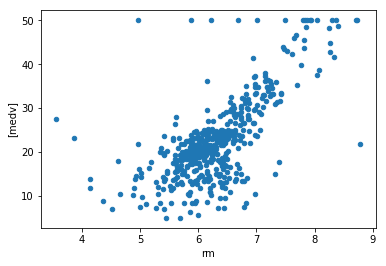

In [13]:
import matplotlib.pyplot as plt
graph1.plot.scatter(x='rm', y=['medv'])
plt.show()

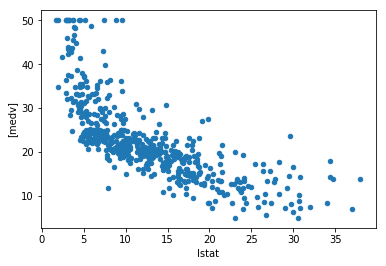

In [14]:
graph1.plot.scatter(x='lstat', y=['medv'])
plt.show()

## Correlation - choosing best features
I have 13 possible feature columns I can use to train my model. One thing to be aware of as I start to add more features is a concept called collinearity. Collinearity occurs where more than one feature contains data that are similar. The effect of collinearity is that my model will overfit - I may get great results on my test data set, but then the model performs worse on unseen data.

In [15]:
data.columns.values

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'], dtype=object)

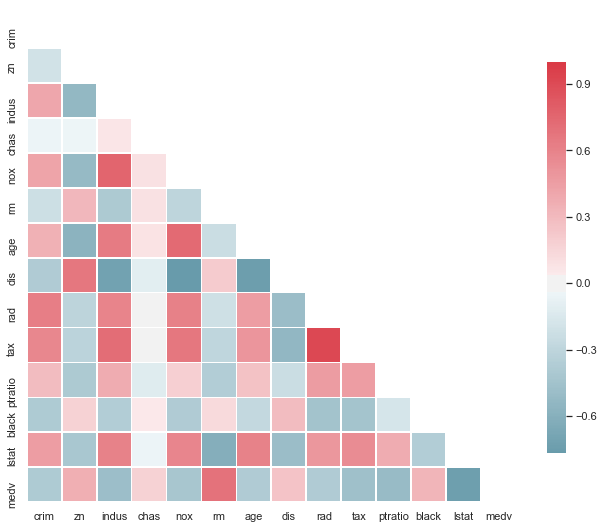

In [16]:
import seaborn as sns

corr = data.corr()
    
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .8})
plt.show()

columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv']

In [17]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## SelectKBest for feature selection
Another alternative to select best features is SelectKBest

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

skb = SelectKBest(f_classif,k='all').fit(features,data['medv'])
scores = skb.scores_
all_features = features.columns.values
sort_index = np.argsort(scores)[::-1]
rank = 1
ranked_features = []
print ("Ranking of features is ")
for x in sort_index:
    print (rank,". Score  ",all_features[x]," is ",scores[x])
    ranked_features.append(all_features[x])
    rank += 1
print (all_features)

Ranking of features is 
1 . Score   lstat  is  5.752150877206952
2 . Score   crim  is  3.413922573375171
3 . Score   rm  is  2.6759977962146526
4 . Score   nox  is  2.3389953342486307
5 . Score   age  is  2.3295445415159532
6 . Score   tax  is  2.2100561423260525
7 . Score   indus  is  2.1512200021551884
8 . Score   rad  is  1.9146485277912566
9 . Score   black  is  1.8183319142221053
10 . Score   ptratio  is  1.7762506492498296
11 . Score   zn  is  1.6982531795697973
12 . Score   dis  is  1.5066868712016697
13 . Score   chas  is  1.1023290965087522
['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'black' 'lstat']


In [19]:
features_3 = ranked_features[:3]
print ("Features in 1st set are ",features_3)

Features in 1st set are  ['lstat', 'crim', 'rm']


From Correlation data, We can confim that variable LSTAT, RM, AGE have good corelation with our output variable MEDV. These variables we need to consider when we optimze our predictive value. From SelectKBest these features are the best for prediction as well.

## Data visualizations

Some features are exponential, some are modal.


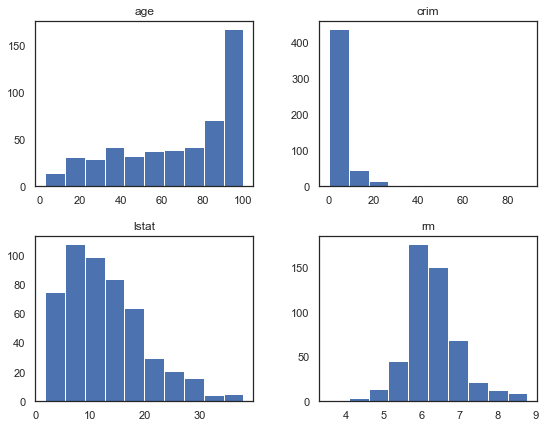

In [27]:
# histograms
features3 = data[['rm','lstat','age','crim']]
features3.hist(bins=10,figsize=(9,7),grid=False);

2 Features are normally distributed (rm and lstat), however age and crim are not normally distributed.
Will try to apply StandardScaler for a choice of an algorithm anyway.


C:\Users\dave_\Anaconda3_2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


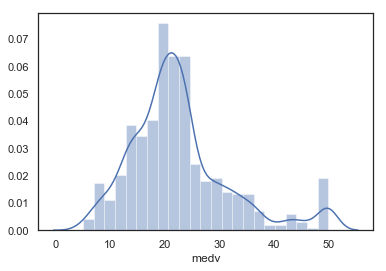

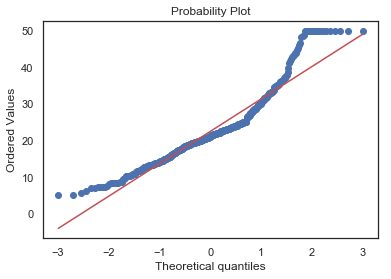

In [21]:
#histogram
from scipy import stats
sns.distplot(data['medv']);


fig=plt.figure()
res=stats.probplot(data['medv'], plot=plt)

It shows 'peakedness', positive skewness and does not follow the diagonal line. A simple data transformation can solve the problem. Will do in by standardizing the data

## Data Preprocessing



## Developing a Model
<br>


## Implementation: Define a Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, I will be calculating the coefficient of determination, R2, to quantify my model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

For the performance_metric function in the code cell below, I will need to implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.
Assign the performance score to the score variable.

In [22]:
#Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

## Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
Split the data into 80% training and 20% testing.
Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [28]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split 

features3 = data[['rm','lstat','age','crim']]

# Split-out validation dataset

seed = 40
X_train, X_validation, Y_train, Y_validation = train_test_split(features3, prices, test_size=0.2, random_state = seed)


In [29]:
# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('SVR', SVR()))



results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -27.269517 (10.682007)
LASSO: -30.819470 (13.766759)
EN: -31.918633 (14.073960)
KNN: -31.217051 (14.352066)


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest

RF: -16.594363 (7.230256)
DT: -23.831820 (12.347270)
SVR: -68.705333 (30.196672)


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\svm\base.py:196: Fut

## Compare algorithms

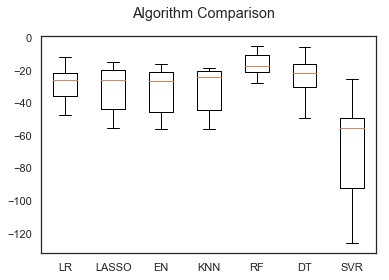

In [30]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Standardize the dataset with StandardScaler()
Standartization is a common requirement for many machine learning estimators, as they might behave bad;y if the individual features do not more of less look like standard normally distributed data.

Here, we will use StandardScaler(), as 2 out of 4 features are normally distrubuted.
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.


In [33]:
pipelines = []
pipelines.append(('ScLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScLR: -27.269517 (10.682007)
ScLASSO: -28.701427 (12.019145)
ScEN: -31.094162 (13.718341)
ScKNN: -16.310814 (6.919575)
ScDT: -25.720235 (12.317270)
ScSVR: -26.066764 (15.636305)
ScRF: -17.174796 (8.880255)


C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dave_\Anaconda3_2\lib\site-packages\sklearn\ensemble\forest

SO, 2 of the best algorothms are KNN and RandomForest

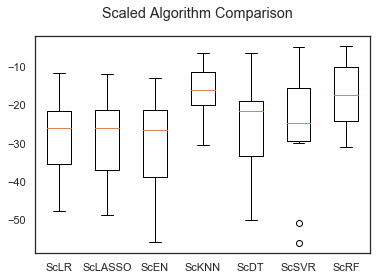

In [34]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Analyzing Model Performance
In this third section of the project, I'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, I'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing my model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

## Implementation: Fitting a Model
My final implementation requires that you bring everything together and train a model using the decision tree algorithm. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

In addition, I will find my implementation by using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set. 

Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.
Assign this object to the 'regressor' variable.
Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.
Use make_scorer from sklearn.metrics to create a scoring function object.
Pass the performance_metric function as a parameter to the object.
Assign this scoring function to the 'scoring_fnc' variable.
Use GridSearchCV from sklearn.grid_search to create a grid search object.
Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.
Assign the GridSearchCV object to the 'grid' variable.


# Decision Tree

In [23]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=100)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #  Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Optimal Model for Decision Tree
What is the maximum depth does the optimal model have?



In [24]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [25]:
from sklearn import metrics #metrics module for accuracy calculations
dtm1 = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
dtm2 = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm1.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm1.score(X_train,y_train)))

dtm2.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtm2.score(X_test,y_test)))

R-Squared on train dataset=0.8357110871602346
R-Squared on test dataset=0.9144759480525273


So, prediction error is about 9% on average. Run decision tree for all dataset and add decision tree predictor to a dataframe:

In [27]:
predictions_dectree = dtm2.predict(features3)
#print(predictions_dectree)

In [ ]:
#add decision tree predictions as a column
column_values=pd.Series(predictions_dectree)

data.insert(loc=14,column='decisiontree', value=column_values)

#graph1.plot.scatter(x='lstat', y=['medv','dtm'])
#plt.show()

In [29]:
#add index
data['index']=range(1,len(data)+1)
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,decisiontree,index
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,26.180000,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.800000,2
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.671429,3
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.671429,4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,26.180000,5


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


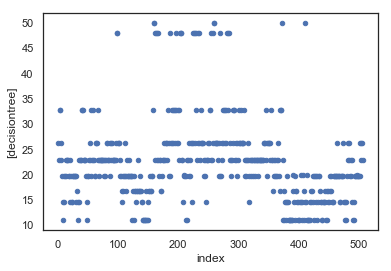

In [30]:
#plot predicted value using decisiontree vs index value
data.plot.scatter(x='index', y=['decisiontree'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


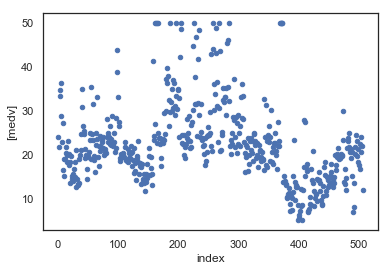

In [31]:
#plot actual value vs index value
data.plot.scatter(x='index', y=['medv'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


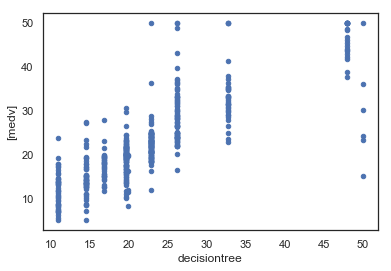

In [32]:
#plot actual value vs index value
data.plot.scatter(x='decisiontree', y=['medv'])
plt.show()

On the picture above data shound be as close to a straigh life from (0,0) to (50,50)


## Bagging (using Random Forest) 